# EDA - Credit Card Customers Dataset


## Introducción

Este trabajo consiste en realizar un análisis exploratorio de datos del dataset [credit card customers](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers) de Kaggle. Este notebook contiene un análisis de datos para extraer inferencias útiles para el negocio para comprender la rotación de clientes antes de que cancelen sus tarjetas de crédito.

## ¿Qué es un Churn y porqué es importante?

Por Churn nos referimos a una rotación de los clientes, esto significa que el cliente deja de usar el producto o abandona la empresa. En este caso estamos hablando que la empresa es un banco. Tener una tasa de abandono creciente puede significar menores ingresos y márgenes de beneficio, pérdidas de clientes frente a otros competidores. Es también importante mencionar que mantener a un cliente dentro del banco es más fácil y barato que adquirir un nuevo cliente. Por otro lado el churn se puede deber a tener servicios o productos no funcionan, es por ello que es importante para el banco entender estás métricas y tomar acción para mejorarlo con insights basados en datos.

## Objetivos

Un gerente comercial de una cartera de tarjetas de crédito de consumo se enfrenta al problema de la deserción de clientes. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonarán.

El objetivo de este análisis es comprender qué clientes corren el riesgo de abandonar y visualizarlo de manera clara. El alcance es hacer un análisis exploratorio de datos para comprender qué circunstancias afectan la tasa de abandono. Si es posible, exploraremos propuestas para mejorar la tasa de abandono o qué datos y preguntas serían relevantes para explorar más a fondo para reducir el índice de abandono.


Al observar los datos, podemos comenzar a formular algunas preguntas para informar como una hipótesis sobre las características más impactantes que afectan la tasa de abandono. Exploremos los datos y proporcionemos un análisis perspicaz tratando de responder algunas preguntas relevantes:

1. ¿Un índice de utilización de tarjetas de crédito más bajo indica una mayor tasa de rotación?
1. ¿El índice de utilización de tarjetas de crédito es más bajo en los clientes que abandonan?
1. ¿Cómo impacta el monto total de la transacción y la frecuencia en la tasa de abandono?
1. ¿Cómo afecta el riesgo de churn la cantidad de meses en libro (el tiempo que el cliente ha tenido una relación con el banco)?
1. ¿El límite de crédito afecta la tasa de abandono?
1. ¿Cuál es la influencia de la categoría de ingreso en las personas con cierto estado civil para dejar el servicio?
1. ¿Qué categoría de tarjeta de clientes necesita más atención de los proveedores de servicios?
1. ¿Qué variables demográficas predicen con mayor impacto la rotación de un cliente?
1. ¿Cuáles son las diferencias significativas entre el Cliente abandonado y el Cliente existente en términos de características demográficas en el conjunto de datos?

Una hipótesis es que el comportamiento de los clientes antes de abandonar el servicio debería ser un buen indicador de su salida. Las variables que pueden mostrar eso podrían ser aquellas que muestran con qué frecuencia y cuánto están usando el servicio. Si los clientes reducen el uso de la tarjeta de crédito, esto podría indicar que obtuvieron otra tarjeta que están usando, de un competidor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib
import os


In [2]:
CURRENT_DIR = os.getcwd()
DATA_DIR = os.path.join(CURRENT_DIR, os.pardir, 'data')

In [3]:
BANK_CHURNERS = os.path.join(DATA_DIR, 'BankChurners_raw.csv')
BANK_CHURNERS

'/work/credit-card-customers/notebooks/../data/BankChurners_raw.csv'

In [4]:
credit_data = pd.read_csv(BANK_CHURNERS)
df = credit_data.copy()

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']

del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- CLIENTUM: número de clientes
- Attrition_Flag: Estado del cliente, 1 -> cuenta cerrada, 0 -> cuenta abierta
- Customer_Age: 
- Gender: 
- Dependent_count: 
- Education_Level: 
- Marital_Status: 
- Income_Category:
- Card_Category:
- Months_on_book:
- Total_Relationship_Count:
- 

In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- ¿Cuantos clientes se han ido y cuantos continuan?

In [10]:
status = df['Attrition_Flag'].value_counts()
status

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
status_gender = pd.crosstab(df['Gender'], df['Attrition_Flag'])
status_gender

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Gender'>

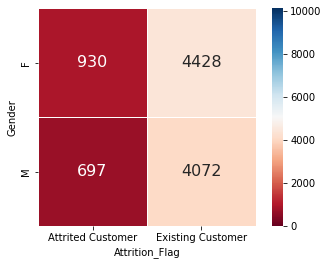

In [12]:
sns.heatmap(status_gender, cmap='RdBu', vmin=0, vmax=10127,
    square=True, annot=True, fmt='.0f', linewidth = 1, linecolor = 'white',
    annot_kws = {
        'fontsize': 16,
        'fontweight': 'normal',
        'fontfamily': 'sans-serif'
    })

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Card_Category'>

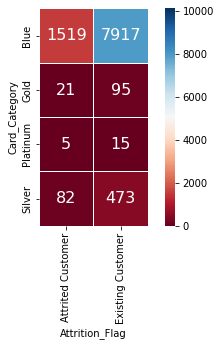

In [13]:
card = pd.crosstab(df['Card_Category'],df['Attrition_Flag'])
sns.heatmap(card, cmap='RdBu', vmin=0, vmax=10127,
    square=True, annot=True, fmt='.0f', linewidth = 1, linecolor = 'white',
    annot_kws = {
        'fontsize': 16,
        'fontweight': 'normal',
        'fontfamily': 'sans-serif'
    })

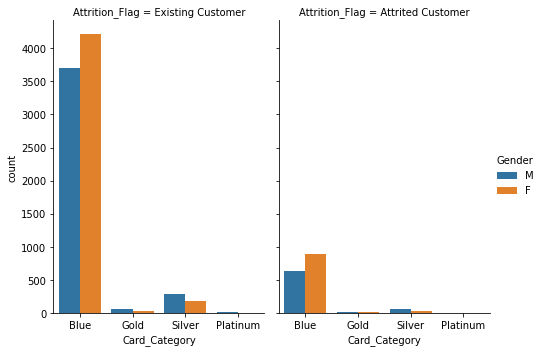

In [14]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=df, kind="count",
                height=5, aspect=.7);


La mayoría de las personas que dejan de ser clientes usaban tarjeta "Blue"

Estudiaremos la distribución a partir de la categoría de ingresos

In [15]:
income = pd.crosstab(df['Income_Category'],df['Attrition_Flag'])
income


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Income_Category'>

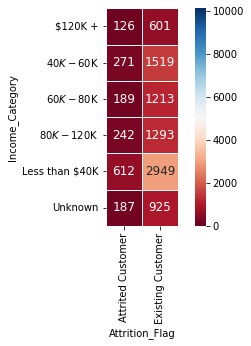

In [16]:
sns.heatmap(income, cmap='RdBu', vmin=0, vmax=10127,
    square=True, annot=True, fmt='.0f', linewidth = 1, linecolor = 'white',
    annot_kws = {
        'fontsize': 12,
        'fontweight': 'normal',
        'fontfamily': 'sans-serif'
    })

<AxesSubplot:xlabel='Income_Category'>

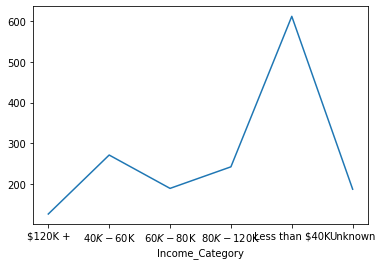

In [17]:
income['Attrited Customer'].plot()

In [18]:
education_level = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Education_Level'>

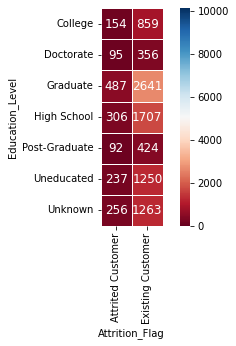

In [19]:
sns.heatmap(education_level, cmap='RdBu', vmin=0, vmax=10127,
    square=True, annot=True, fmt='.0f', linewidth = 1, linecolor = 'white',
    annot_kws = {
        'fontsize': 12,
        'fontweight': 'normal',
        'fontfamily': 'sans-serif'
    })

In [20]:
df['Education_Level'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Graduate         30.9%
High School      19.9%
Unknown          15.0%
Uneducated       14.7%
College          10.0%
Post-Graduate     5.1%
Doctorate         4.5%
Name: Education_Level, dtype: object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2bd31ba2-a63a-401e-9d82-bcf3c4504ed2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>